In [57]:
import cv2
import numpy as np
import os
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from os import listdir
from os.path import isfile, join
import cv2


In [52]:
folder_path=r'C:\Users\sures\Desktop\Python\face-emotion-recognition\images'
emotion_labels = ['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
dict_emotion={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4, 'sad':5, 'surprise':6}
print(dict_emotion['angry'])

0


In [53]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_classifier =load_model('model/model.h5')

In [62]:
def prepare_data(type_data):
    df= pd.DataFrame([])
    for emotion in emotion_labels:
        
        mypath=folder_path+'/'+type_data+'/'+emotion
        all_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        #print(emotion,':',len(all_files))
        for img_file in all_files:
            if ('jpg' in img_file) | ('jpeg' in img_file)|('png' in img_file):
                data=[]
                data.append([mypath+'/'+img_file,dict_emotion[emotion]])
                
                df=df.append(data, ignore_index=True)
    return df

In [61]:
def detect_emotion(image_path):
    img = cv2.imread(image_path)
    labels = []
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if True:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = emotion_classifier.predict(roi)[0]

            label=prediction.argmax()
            return label

In [63]:
X= pd.DataFrame([])
X=prepare_data("validation")

In [64]:
X.head(10)

,0,1
0,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
1,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
2,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
3,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
4,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
5,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
6,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
7,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
8,C:\Users\sures\Desktop\Python\face-emotion-rec...,0
9,C:\Users\sures\Desktop\Python\face-emotion-rec...,0


In [65]:
y= pd.DataFrame([])
for index, row in X.iterrows():
    prediction=detect_emotion(row[0])
    #print(prediction)
    y=y.append([prediction], ignore_index=True)
    
X['Prediction']=y

In [73]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
10672,6
10673,6
10674,6
10675,6


In [46]:
test_set.classes

array([0, 0, 0, ..., 6, 6, 6])

In [47]:
y_pred

array([0, 0, 6, ..., 6, 6, 0], dtype=int64)

In [71]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
10672,6
10673,6
10674,6
10675,6


In [74]:
y[0].replace({"None": -1}, inplace=True)
y_pred=y
y_true=X[1]

print('Confusion Matrix')
cfm=confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

Confusion Matrix
[[1288    0   23   14   48   69   16]
 [ 592    0    2    1    2   14    0]
 [ 126    0 1126   40   53   39  140]
 [  16    0    5 2177   32   13   31]
 [  23    0   25   44 1525   85   31]
 [  59    0   14   17   92 1547   17]
 [   7    0   13   11    4    3 1293]]


<AxesSubplot:>

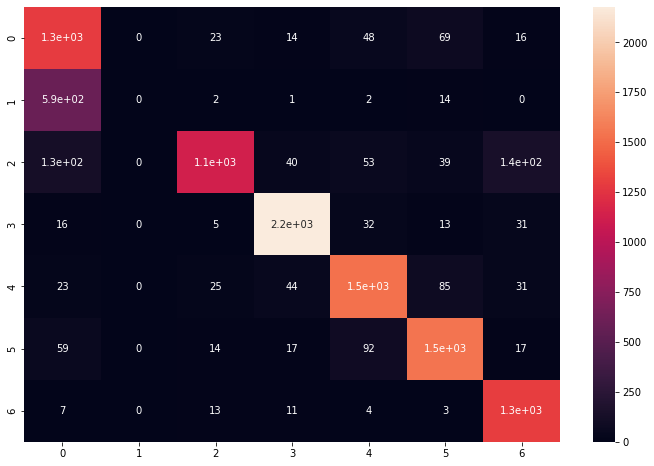

In [78]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
sns.heatmap(cfm, annot=True)

In [75]:
print('Classification Report')
#emotion_labels = ['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
print(classification_report(y_true, y_pred, target_names=emotion_labels))

Classification Report
              precision    recall  f1-score   support

       angry       0.61      0.88      0.72      1458
     disgust       0.00      0.00      0.00       611
        fear       0.93      0.74      0.82      1524
       happy       0.94      0.96      0.95      2274
     neutral       0.87      0.88      0.87      1733
         sad       0.87      0.89      0.88      1746
    surprise       0.85      0.97      0.90      1331

    accuracy                           0.84     10677
   macro avg       0.73      0.76      0.74     10677
weighted avg       0.81      0.84      0.82     10677



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
accuracy_score(test_set.classes, y_pred)

0.8388124004870282